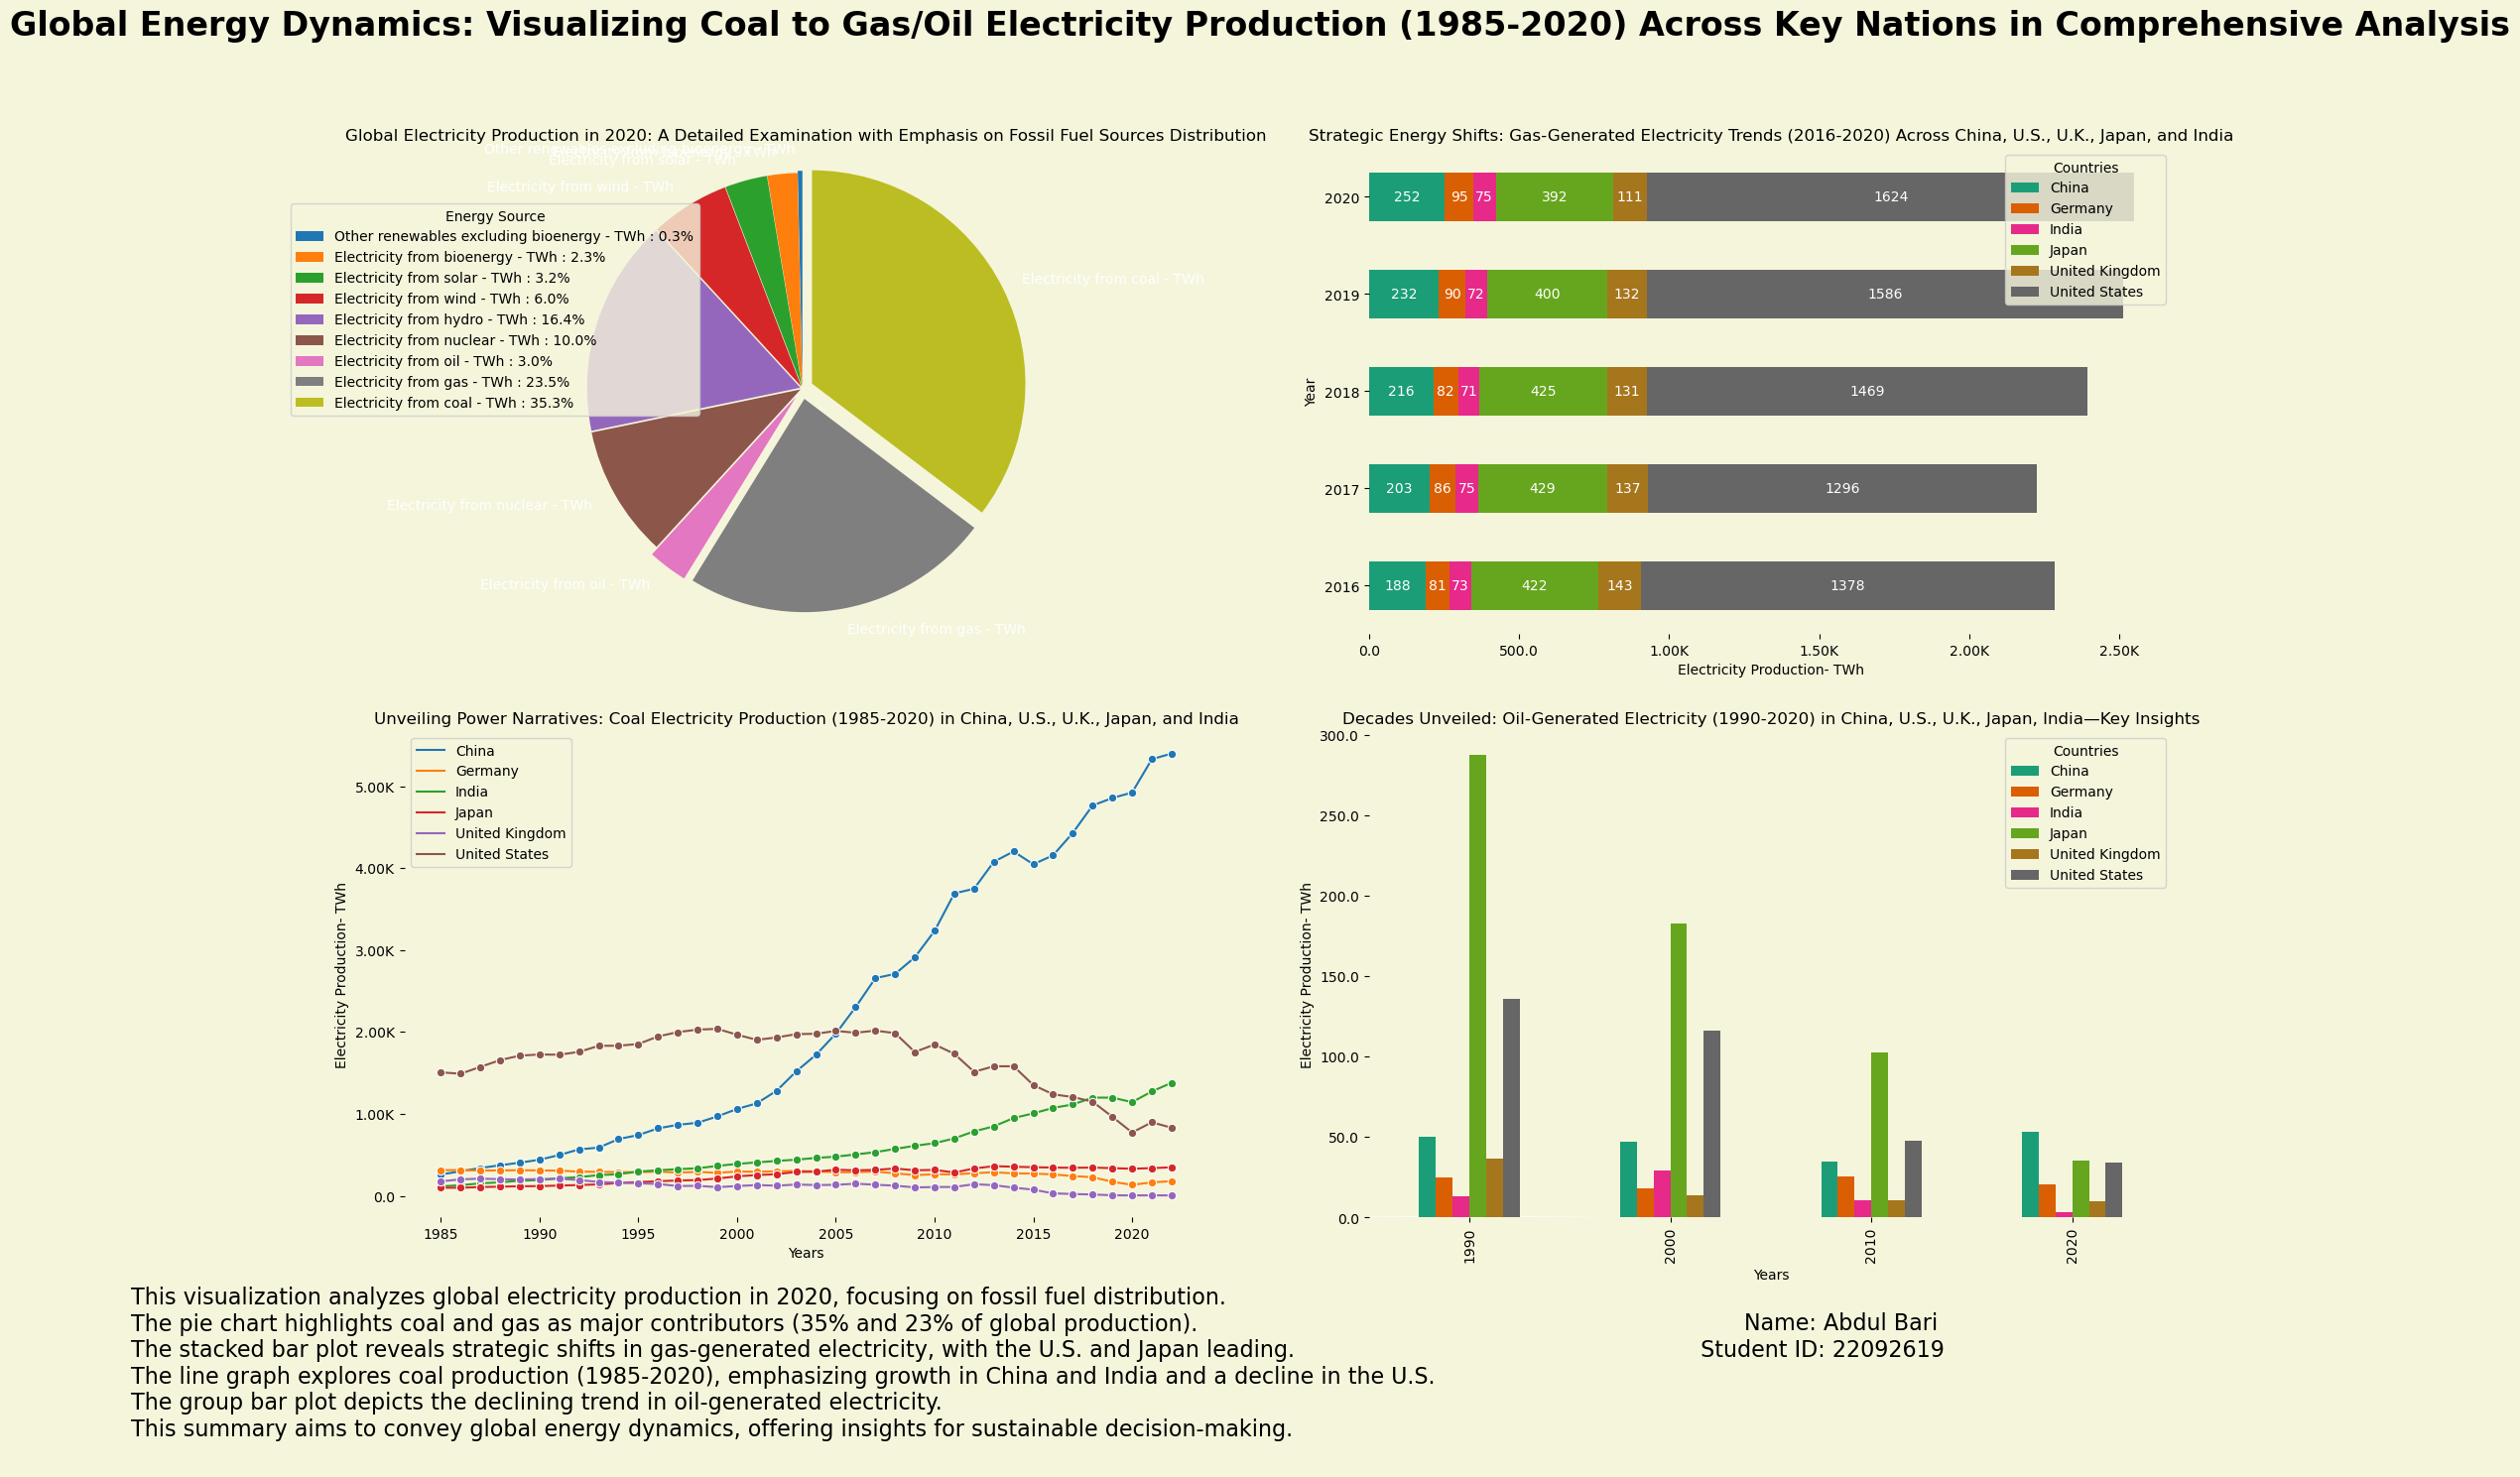

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def format_ticks(value, _):
    """
    Function to Formate the X-ticks and Y-ticks
    Parameters
    ----------
    value : integer
        Value to convert into K or M.
    _ : TYPE
        DESCRIPTION.

    Returns
    -------
    TYPE
        Returnng the String back.

    """
    if value >= 1e6:
        return f'{value / 1e6:.2f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.2f}K'
    else:
        return str(value)


electricity_prod_source_stacked = pd.read_csv(
    'electricity-prod-source-stacked.csv')
cols = list(electricity_prod_source_stacked.columns)[3:]
type_name = []
for names in cols:
    type_name.append(names.split('(')[0])
electricity_prod_source_stacked = electricity_prod_source_stacked.rename(
    columns=dict(zip(electricity_prod_source_stacked.columns[3:], type_name)))
w_electricity_prod_source = electricity_prod_source_stacked[
    electricity_prod_source_stacked['Entity'] == 'World']
w_electricity_prod_source = w_electricity_prod_source.drop(
    ['Entity', 'Code'], axis=1)
electricity_prod_source_2020 = w_electricity_prod_source[w_electricity_prod_source['Year'] == 2020]

countries = [
    'United States',
    'United Kingdom',
    'Japan',
    'Germany',
    'India',
    'China']
electricity_prod_countries = electricity_prod_source_stacked[electricity_prod_source_stacked['Entity'].isin(
    countries)]
electricity_prod_coal = electricity_prod_countries[[
    'Entity', 'Year', 'Electricity from coal - TWh ']]
electricity_prod_gas = electricity_prod_countries[[
    'Entity', 'Year', 'Electricity from gas - TWh ']]
years = [2016, 2017, 2018, 2019, 2020]
electricity_prod_gas = electricity_prod_gas[electricity_prod_gas['Year'].isin(
    years)]
df_pivot = electricity_prod_gas.pivot_table(
    index='Year',
    columns='Entity',
    values='Electricity from gas - TWh ',
    aggfunc='sum')
electricity_prod_oil = electricity_prod_countries[[
    'Entity', 'Year', 'Electricity from oil - TWh ']]
years = [1990, 2000, 2010, 2020]
electricity_prod_oil = electricity_prod_oil[electricity_prod_oil['Year'].isin(
    years)]
df_pivot_oil = electricity_prod_oil.pivot_table(
    index='Year',
    columns='Entity',
    values='Electricity from oil - TWh ',
    aggfunc='sum')
fig, axs = plt.subplots(2, 2, figsize=(23, 14))

label = electricity_prod_source_2020.columns
values = list(electricity_prod_source_2020.iloc[0])[1:]
explode = (0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05)

# Create the pie chart without autopct
wedges, texts, autotexts = axs[0, 0].pie(values, labels=label[1:],
                                         startangle=90, colors=sns.color_palette('tab10'), explode=explode,
                                         autopct='', textprops=dict(color="w"))

# Add a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[0, 0].set_facecolor('#f0f0f0')
fig.gca().add_artist(centre_circle)

# Create a legend with labels and autopct values out of 100
legend_labels = [
    f'{label}: {value/sum(values)*100:.1f}%' for label, value in zip(label[1:], values)]
axs[0, 0].legend(legend_labels, title='Energy Source',
                 facecolor='beige', loc='upper left', bbox_to_anchor=(-0.15, 0.9))

# Set aspect ratio to be equal to ensure a circular pie chart
axs[0, 0].axis('equal')
# Add a title
axs[0, 0].set_title(
    'Global Electricity Production in 2020: A Detailed Examination with Emphasis on Fossil Fuel Sources Distribution')

# Ploting the Stack Bar Plot.
df_pivot.plot(kind='barh', stacked=True, colormap='Dark2', ax=axs[0, 1])
axs[0, 1].legend(title='Countries', facecolor='beige', loc='upper right')
axs[0, 1].set_xlabel('Electricity Production- TWh')
axs[0, 1].set_facecolor('beige')
axs[0, 1].set_title(
    'Strategic Energy Shifts: Gas-Generated Electricity Trends (2016-2020) Across China, U.S., U.K., Japan, and India')
axs[0, 1].xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Adding values on the bars
for i in axs[0, 1].patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    axs[0, 1].annotate(f'{width:.0f}', (x + width / 2, y +
                       height / 2), ha='center', va='center', color='white')


# Ploting the Line Graph
color_Change = 1
sns.lineplot(x='Year', y='Electricity from coal - TWh ',
             data=electricity_prod_coal, hue='Entity', marker='o', ax=axs[1, 0])
# Setting Labels legends and their face color.
axs[1, 0].set_ylabel('Electricity Production- TWh')
axs[1, 0].set_xlabel('Years')
axs[1, 0].set_facecolor('beige')
axs[1, 0].legend(facecolor='beige')
axs[1, 0].set_title(
    'Unveiling Power Narratives: Coal Electricity Production (1985-2020) in China, U.S., U.K., Japan, and India')
axs[1, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Ploting the Stack Bar Plot.
df_pivot_oil.plot(kind='bar', colormap='Dark2', ax=axs[1, 1])
axs[1, 1].legend(title='Countries', facecolor='beige')
axs[1, 1].set_ylabel('Electricity Production- TWh')
axs[1, 1].set_xlabel('Years')
axs[1, 1].set_facecolor('beige')
axs[1, 1].set_title(
    'Decades Unveiled: Oil-Generated Electricity (1990-2020) in China, U.S., U.K., Japan, India—Key Insights')
axs[1, 1].yaxis.set_major_formatter(FuncFormatter(format_ticks))
sns.despine(left=True, right=True, top=True, bottom=True)
fig.patch.set_facecolor('beige')
plt.suptitle(
    'Global Energy Dynamics: Visualizing Coal to Gas/Oil Electricity Production (1985-2020) Across Key Nations in Comprehensive Analysis',
    fontsize=24,
    weight='bold')
description_text = """
This visualization analyzes global electricity production in 2020, focusing on fossil fuel distribution.
The pie chart highlights coal and gas as major contributors (35% and 23% of global production).
The stacked bar plot reveals strategic shifts in gas-generated electricity, with the U.S. and Japan leading.
The line graph explores coal production (1985-2020), emphasizing growth in China and India and a decline in the U.S.
The group bar plot depicts the declining trend in oil-generated electricity.
This summary aims to convey global energy dynamics, offering insights for sustainable decision-making.
"""

# Add text outside the subplots
fig.text(
    0.005,
    0.005,
    description_text,
    va='center',
    ha='left',
    fontsize=16,
    color='black')

# Add student name and ID at the right bottom
plt.gcf().text(
    0.8,
    0.01,
    'Name: Abdul Bari \n Student ID: 22092619',
    ha='right',
    fontsize=16,
    color='black')
#plt.savefig('22092619.png', bbox_inches='tight', pad_inches=0.5, dpi=300)
# Show the plot
plt.show()
